C:\Users\subhadip_jot\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\subhadip_jot\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\subhadip_jot\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; u

predicted=3157.355940, expected=3279.000000
predicted=3196.423165, expected=3222.000000
predicted=3140.436249, expected=3262.000000
predicted=3179.968937, expected=29115.000000
predicted=28894.962215, expected=29177.000000
predicted=29158.838670, expected=29242.000000
predicted=29257.993350, expected=29266.000000
predicted=29298.230514, expected=29243.000000
predicted=29245.647627, expected=29211.000000
predicted=29213.588039, expected=29192.000000
predicted=29194.375285, expected=29214.000000
predicted=29216.116344, expected=29168.000000
predicted=29170.413492, expected=29151.000000
predicted=29153.208505, expected=3253.000000
predicted=3345.141017, expected=3244.000000
predicted=3163.348947, expected=3268.000000
predicted=3178.132203, expected=3234.000000
predicted=3132.576049, expected=3227.000000
predicted=3149.360850, expected=3244.000000
predicted=3166.497357, expected=3257.000000
predicted=3179.766250, expected=3252.000000
predicted=3175.109343, expected=3171.000000
predicted=30

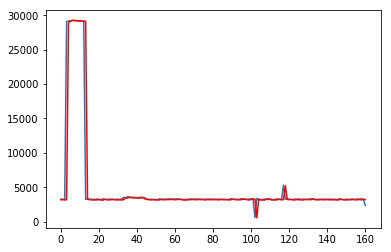

In [27]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

dateparse = lambda dates: datetime.strptime(dates, '%d-%m-%Y')
series = read_csv('data-1556108395698-datewise.csv', parse_dates=['dateformat_date'], index_col='dateformat_date',date_parser=dateparse)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
print(len(predictions))
pyplot.show()